In [1]:
import gym
import matplotlib.pyplot as plt
import torch

In [2]:
# this makes the environment deterministic

from gym.envs.registration import register

register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
)

In [4]:
env = gym.make('FrozenLakeNotSlippery-v0')
number_of_states = env.observation_space.n # 16
numbers_of_actions = env.action_space.n # 4

gamma = 0.9 # when gamma set to 1, the success rate is awful
e_greedy = 0.7 # random actions
e_greedy_final = 0.1
e_greedy_decay = 0.999

Q = torch.zeros([number_of_states, numbers_of_actions])

Episode finished after 22 steps
Episode finished after 12 steps
Episode finished after 8 steps
Episode finished after 4 steps
Episode finished after 3 steps
Episode finished after 8 steps
Episode finished after 4 steps
Episode finished after 9 steps
Episode finished after 8 steps
Episode finished after 8 steps
Episode finished after 14 steps
Episode finished after 16 steps
Episode finished after 11 steps
Episode finished after 12 steps
Episode finished after 2 steps
Episode finished after 3 steps
Episode finished after 11 steps
Episode finished after 2 steps
Episode finished after 6 steps
Episode finished after 25 steps
Episode finished after 7 steps
Episode finished after 5 steps
Episode finished after 4 steps
Episode finished after 7 steps
Episode finished after 3 steps
Episode finished after 6 steps
Episode finished after 5 steps
Episode finished after 7 steps
Episode finished after 9 steps
Episode finished after 3 steps
Episode finished after 6 steps
Episode finished after 13 steps

Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 9 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 4 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 2 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 3 steps
Episode finished after 8 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 8 steps
Episode finished after 8 steps
Episode finished after 7 steps
Episode 

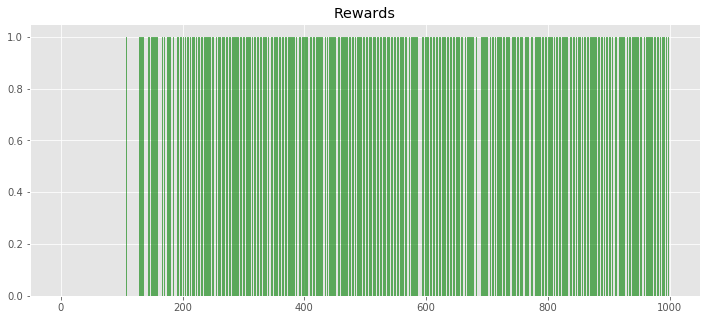

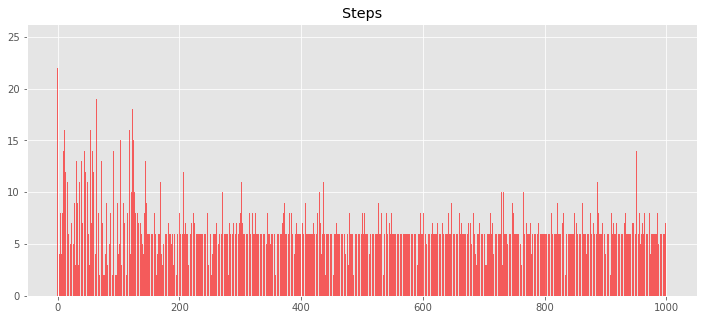

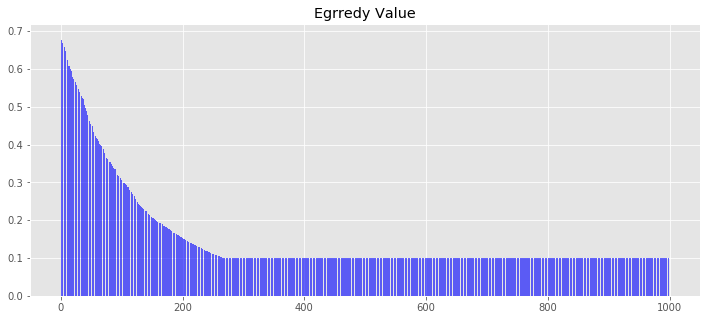

In [5]:
num_episodes = 1000
steps_total = []
rewards_total = []
e_greedy_total = []

for episode in range(num_episodes):
    state = env.reset()
    step = 0
    while True:
        step += 1
        
        random_for_egreedy = torch.rand(1)[0]
        if random_for_egreedy > e_greedy:
            random_values = Q[state] + torch.rand(1, numbers_of_actions) / 1000 # init space with random values
            action = torch.max(random_values, 1)[1][0].item()
        else:
            action = env.action_space.sample()
            
        if e_greedy > e_greedy_final:
            e_greedy *= e_greedy_decay
        
        new_state, reward, done, info = env.step(action)
        
        Q[state, action] = reward + gamma * torch.max(Q[new_state])
        state = new_state
        
        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            e_greedy_total.append(e_greedy)
            print("Episode finished after %i steps" % step)
            break


print(Q)
print("Percent of episodes finished successfully: {0}".format(sum(rewards_total)/num_episodes))
print("Percent of episodes finished successfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))
print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))


plt.style.use('ggplot')

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green')
plt.show()

plt.figure(figsize=(12,5))
plt.title("Steps")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red')
plt.show()

plt.figure(figsize=(12,5))
plt.title("Egrredy Value")
plt.bar(torch.arange(len(e_greedy_total)), e_greedy_total, alpha=0.6, color='blue')
plt.show()